# Task 50 - Unsupervised Learning III: PCA

Hemant Thapa

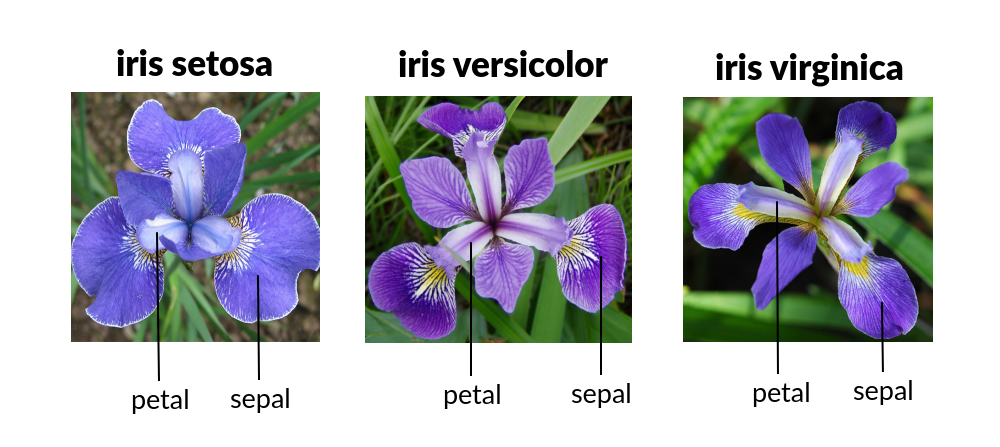

### LIBRARIES

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('iris.csv')
df[:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.drop('Id', axis=1, inplace=True)

In [49]:
df[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Inspecting data

#### 1. Positive and Negative correlation

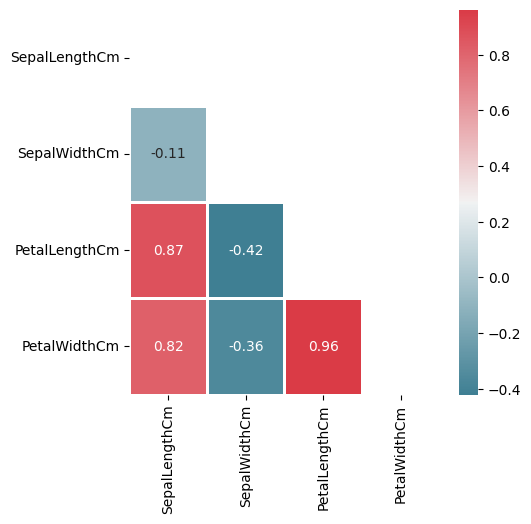

In [50]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
    #get correlations
    corrs = df.corr()
    
    #plot figsize
    fig, ax = plt.subplots(figsize=(5,5))
    
    #to mask mirrored side of the heatmap
    dropSelf = np.zeros_like(corrs)
    dropSelf[np.triu_indices_from(dropSelf)] = True
    
    #Generate Heat Map, with annotations of the correlation strength and 2-decimals floats
    ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)
    
    plt.show()
    
corr_heatmap(df)

#### 2. Applying PCA (Principal Component Analysis)

In [51]:
#We don't have missing values, and if any missing values are exist. we will drop that rows
df = df.dropna()

In [52]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
df.Species = df.Species.replace('Iris-setosa', 0)
df.Species = df.Species.replace('Iris-versicolor', 1)
df.Species = df.Species.replace('Iris-virginica', 2)

In [54]:
df.Species.unique()

array([0, 1, 2])

In [55]:
#Selecting standardize features
X = StandardScaler().fit_transform(df.values)

In [56]:
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673, -1.22474487],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673, -1.22474487],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673, -1.22474487],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673, -1.22474487],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673, -1.22474487]])

In [57]:
#Choosing number of components to be generated
nr_comps = 3
pca = PCA(n_components=nr_comps)

In [58]:
#obtian components
principal_components = pca.fit_transform(X)

In [59]:
#Transform the components into a pandas dataframe
pca_df = pd.DataFrame(principal_components, index=df.index)

In [60]:
#This is to include the country code as the rowname in the PC's
pca_df.head()

,0,1,2
0,-2.576198,0.498650,-0.047863
1,-2.419715,-0.660518,-0.195736
2,-2.662302,-0.326611,0.120244
3,-2.605790,-0.582925,0.142038
4,-2.683088,0.666354,0.109300


#### The principal components are uncorrelated , showing that PCA has summarised all related information in a smaller number of Variables

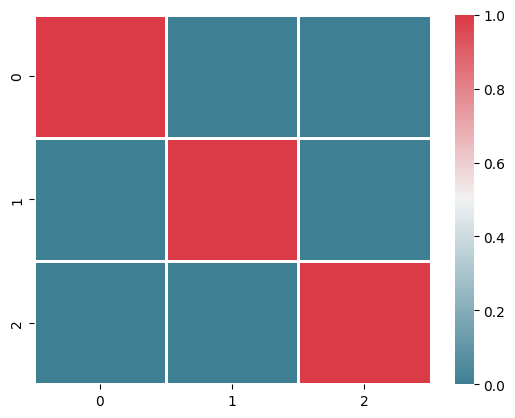

In [61]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap, linewidth=1)
plt.show()

#### Interpreting PCA

#### Acessing the correlations between the components and original variables using the components_method of our PCA() object.

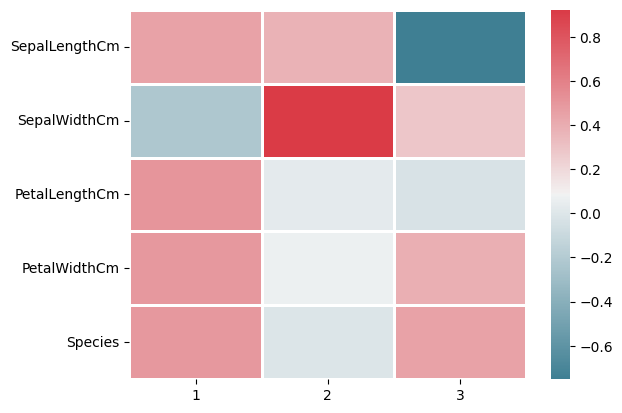

In [62]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components, cmap=colormap, linewidth=1)
plt.show()

### VISUALISATION AND COMPARISION PLOT BETWEEN ORIGINAL AND AFTER PCA 

In [63]:
#Loading dataset again
df = pd.read_csv('iris.csv')
df[:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
df.drop('Id', axis=1, inplace=True)

In [65]:
df.Species = df.Species.replace('Iris-setosa', 0)
df.Species = df.Species.replace('Iris-versicolor', 1)
df.Species = df.Species.replace('Iris-virginica', 2)
df[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
df.Species.unique()

array([0, 1, 2])

In [67]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [68]:
X[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
X = X.values.reshape(-1,4)

In [70]:
#Checking dimesion of X
X.ndim

2

In [71]:
y = df['Species']
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [72]:
#Checking dimesion of y
y.ndim

1

In [73]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [74]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
# Apply PCA to the scaled data with n_components=3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [76]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [77]:
#Dropping 'Species' column here, won't affect our y
df.drop('Species', axis=1, inplace = True)

In [78]:
#Checking drop column
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

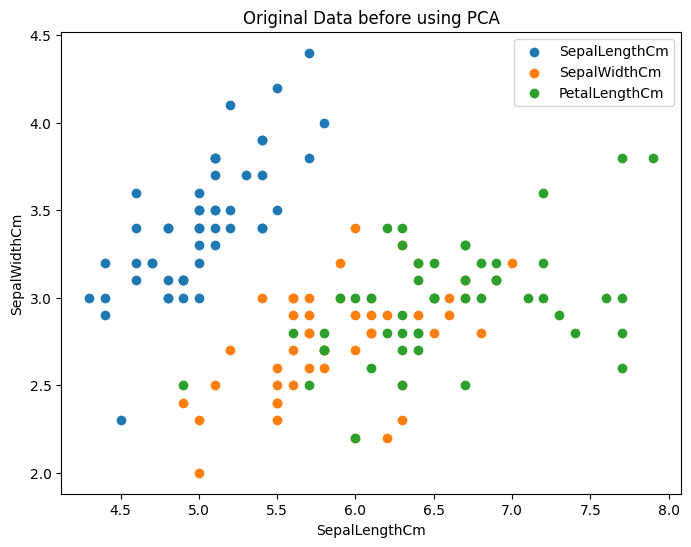

In [79]:
# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Plot the original data using different colors for different classes
for class_idx in np.unique(y):
    plt.scatter(X[y==class_idx, 0], X[y==class_idx, 1], label=df.columns[class_idx])
    
# Set x-axis label as the name of the first feature
plt.xlabel(df.columns[0])

# Set y-axis label as the name of the second feature
plt.ylabel(df.columns[1])

#Title of plot
plt.title("Original Data before using PCA")

# Show the legend
plt.legend()

# Show the plot
plt.show()


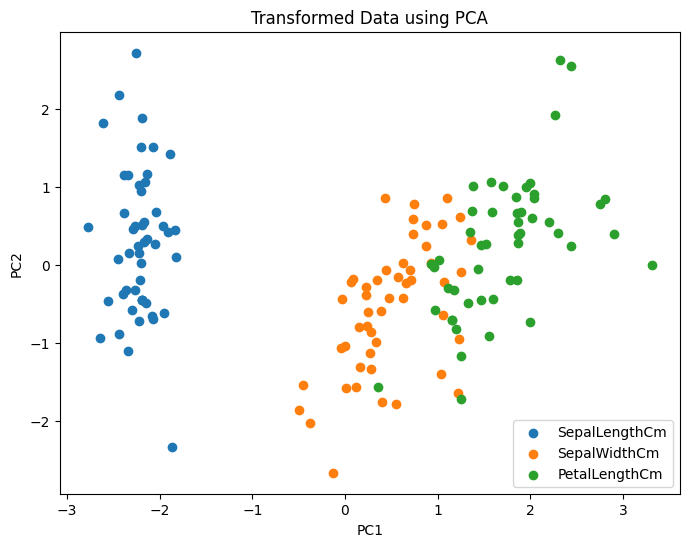

In [80]:
# Plot transformed data using PCA
plt.figure(figsize=(8, 6))
for class_idx in np.unique(y):
    # Plot each class as a scatter plot using PC1 and PC2
    plt.scatter(X_pca[y==class_idx, 0], X_pca[y==class_idx, 1], 
                label=df.columns[class_idx])
    
# Label the x-axis as PC1 and y-axis as PC2
plt.xlabel("PC1")
plt.ylabel("PC2")

# Add a legend to identify each class
plt.legend()

# Add a title to the plot
plt.title("Transformed Data using PCA")

# Display the plot
plt.show()


#### The purpose of PCA is to reduce the dimensionality of a dataset while retaining as much information as possible.

In iris dataset, which has four features, and separates the data into X (features) and y (target variable). 
The data is then scaled using StandardScaler, which is a common preprocessing step in PCA.

PCA is applied to the scaled data with n_components set to 3, meaning that the number of components in the transformed data will be reduced to 3. 
This transformed data is stored in X_pca.

Finally, the code plots the original data using all 4 features and the transformed data using the first 2 Principal Components (PC1 and PC2). The plots show the distribution of the 3 classes in the iris dataset, and the transformed data using PCA helps to visualize the relationships between the classes in a 2-dimensional space.

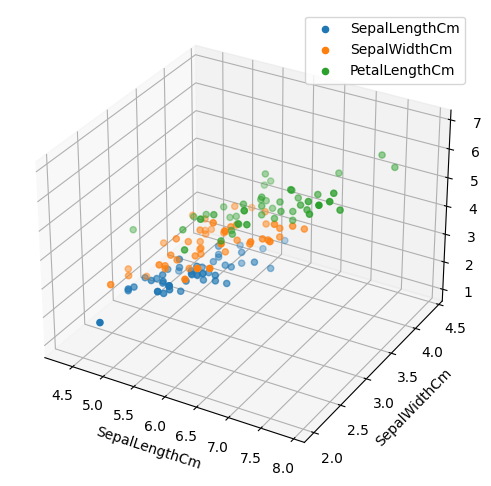

In [81]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize the figure and set its size
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Loop over unique class indices and plot the corresponding points in 3D
for class_idx in np.unique(y):
    ax.scatter(X[y==class_idx, 0], X[y==class_idx, 1], X[y==class_idx, 2], label=df.columns[class_idx])

# Set x, y, and z axis labels as the names of the first three columns in the original dataframe (df)
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])

# Display the plot legend
plt.legend()

# Show the plot
plt.show()

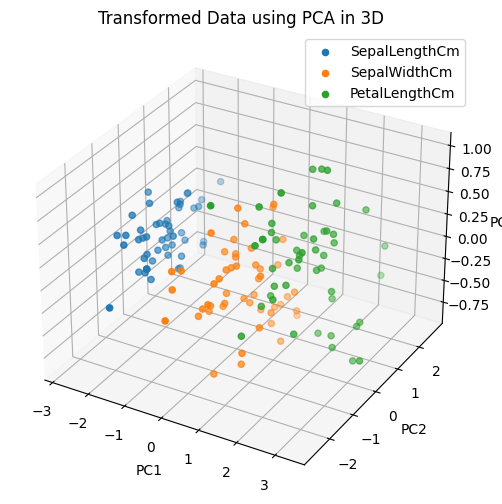

In [82]:
# Plot transformed data using PCA in 3D
fig = plt.figure(figsize=(8, 6)) # Initialize the figure and set its size
ax = fig.add_subplot(111, projection='3d') # Add a subplot and set its projection to 3D

# Loop over unique class indices and plot the corresponding points in 3D
for class_idx in np.unique(y):
    ax.scatter(X_pca[y==class_idx, 0], X_pca[y==class_idx, 1], X_pca[y==class_idx, 2], label=df.columns[class_idx])

# Set x, y, and z axis labels as "PC1", "PC2", and "PC3" respectively
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Display the plot legend
ax.legend()

# Set the title of the plot
plt.title("Transformed Data using PCA in 3D")

# Show the plot
plt.show()

The purpose of 3D visualization is to allow for a more intuitive representation of data that has three dimensions, 
as compared to 2D visualization which only represents data with two dimensions.

3D visualization allows us to represent all three features in a single plot, by adding a third dimension to the 2D plane.This third dimension can be used to encode the third feature, allowing for a more complete representation of the data. This can lead to a deeper understanding of the relationships between the features and can help to uncover patterns in the data that may not be apparent from a 2D representation.


3D visualization provides a more comprehensive representation of data with multiple features and can be useful in cases where 2D visualization is insufficient.